In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
from tensorflow import keras
import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization
from sklearn.utils import shuffle

In [121]:
data = pd.read_csv('combined.csv', sep='\t')
test_data = pd.read_csv('combined_test.csv', sep='\t')

In [11]:
data.head()

,peak_1,peak_2,peak_3,peak_4,peak_5,peak_6,codes
0,5.556681,4.091404,4.501916,4.209752,2.451787,2.150988,1
1,5.212766,3.115224,5.286706,4.546477,2.419685,3.152779,7
2,5.260573,3.143794,5.881500,3.262469,2.093593,4.084726,7
3,4.337921,3.756750,1.603347,2.007628,2.470347,2.144694,3
4,5.541429,4.829944,4.322524,4.729935,2.327353,3.283109,8


In [12]:
X = data[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]
y = data["codes"]

In [13]:
# split data to train and test arrays
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [14]:
# transform numbers into tensor
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [15]:
# take out some training data for the validation process
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [104]:
#create the model 
model_dropout = models.Sequential()
model_dropout.add(layers.Dense(512, activation='relu', input_dim=6))
model.add(layers.Dropout(0.5))
model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dense(512, activation='relu'))
model_dropout.add(layers.Dense(128, activation='relu'))
model_dropout.add(layers.Dense(10, activation='softmax'))

model_dropout.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
# little modification to test accuracy and ovefitting
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=6))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
model_small = models.Sequential()
model_small.add(layers.Dense(512, activation='relu', input_dim=6))
model_small.add(layers.Dense(512, activation='relu'))
model_small.add(layers.Dense(512, activation='relu'))
model_small.add(layers.Dense(512, activation='relu'))
model_small.add(layers.Dense(10, activation='softmax'))

model_small.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
# training the model with training data and using validation to help it learn
history_small = model_small.fit(partial_X_train, partial_y_train, epochs=500, batch_size=500, validation_data=(X_val, y_val))

Epoch 1/500
29/29 [==============================] - 1s 29ms/step - loss: 0.9296 - accuracy: 0.6785 - val_loss: 0.9439 - val_accuracy: 0.6744
Epoch 497/500
29/29 [==============================] - 1s 29ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.3348 - val_accuracy: 0.9471
Epoch 498/500
29/29 [==============================] - 1s 30ms/step - loss: 0.0174 - accuracy: 0.9969 - val_loss: 0.3241 - val_accuracy: 0.9485
Epoch 499/500
29/29 [==============================] - 1s 30ms/step - loss: 0.0127 - accuracy: 0.9984 - val_loss: 0.3286 - val_accuracy: 0.9509
Epoch 500/500
29/29 [==============================] - 1s 30ms/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.3372 - val_accuracy: 0.9502


In [107]:
history_dropout = model_dropout.fit(partial_X_train, partial_y_train, epochs=500, batch_size=500, validation_data=(X_val, y_val))

Epoch 1/500
29/29 [==============================] - 2s 41ms/step - loss: 2.1782 - accuracy: 0.1904 - val_loss: 1.9119 - val_accuracy: 0.3260
Epoch 2/500
29/29 [==============================] - 1s 32ms/step - loss: 1.8558 - accuracy: 0.3568 - val_loss: 1.7466 - val_accuracy: 0.3982
Epoch 3/500
29/29 [==============================] - 1s 31ms/step - loss: 1.6632 - accuracy: 0.4341 - val_loss: 1.5687 - val_accuracy: 0.4383
Epoch 4/500
29/29 [==============================] - 1s 33ms/step - loss: 1.4914 - accuracy: 0.4957 - val_loss: 1.3578 - val_accuracy: 0.5661
Epoch 5/500
29/29 [==============================] - 1s 32ms/step - loss: 1.3234 - accuracy: 0.5624 - val_loss: 1.2575 - val_accuracy: 0.5689
Epoch 6/500
29/29 [==============================] - 1s 32ms/step - loss: 1.2076 - accuracy: 0.5935 - val_loss: 1.1918 - val_accuracy: 0.5843
Epoch 7/500
29/29 [==============================] - 1s 32ms/step - loss: 1.1413 - accuracy: 0.6068 - val_loss: 1.1663 - val_accuracy: 0.5888
Epoch 

29/29 [==============================] - 1s 32ms/step - loss: 0.1306 - accuracy: 0.9601 - val_loss: 0.3663 - val_accuracy: 0.9023
Epoch 116/500
29/29 [==============================] - 1s 33ms/step - loss: 0.1479 - accuracy: 0.9534 - val_loss: 0.3767 - val_accuracy: 0.9051
Epoch 117/500
29/29 [==============================] - 1s 36ms/step - loss: 0.1395 - accuracy: 0.9573 - val_loss: 0.3364 - val_accuracy: 0.9186
Epoch 118/500
29/29 [==============================] - 1s 34ms/step - loss: 0.1347 - accuracy: 0.9584 - val_loss: 0.3656 - val_accuracy: 0.9071
Epoch 119/500
29/29 [==============================] - 1s 33ms/step - loss: 0.1375 - accuracy: 0.9583 - val_loss: 0.3233 - val_accuracy: 0.9212
Epoch 120/500
29/29 [==============================] - 1s 32ms/step - loss: 0.1342 - accuracy: 0.9579 - val_loss: 0.3610 - val_accuracy: 0.9099
Epoch 121/500
29/29 [==============================] - 1s 33ms/step - loss: 0.1254 - accuracy: 0.9627 - val_loss: 0.3809 - val_accuracy: 0.8983
Epoch 

Epoch 172/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0629 - accuracy: 0.9835 - val_loss: 0.3255 - val_accuracy: 0.9313
Epoch 173/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0543 - accuracy: 0.9859 - val_loss: 0.3417 - val_accuracy: 0.9297
Epoch 174/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0596 - accuracy: 0.9857 - val_loss: 0.3341 - val_accuracy: 0.9330
Epoch 175/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0630 - accuracy: 0.9799 - val_loss: 0.3363 - val_accuracy: 0.9288
Epoch 176/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0692 - accuracy: 0.9786 - val_loss: 0.3378 - val_accuracy: 0.9302
Epoch 177/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.3474 - val_accuracy: 0.9296
Epoch 178/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0752 - accuracy: 0.9763 - val_loss: 0.3601 - val_accuracy:

Epoch 229/500
29/29 [==============================] - 1s 32ms/step - loss: 0.1515 - accuracy: 0.9487 - val_loss: 0.3891 - val_accuracy: 0.9277
Epoch 230/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0897 - accuracy: 0.9726 - val_loss: 0.3649 - val_accuracy: 0.9255
Epoch 231/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0600 - accuracy: 0.9792 - val_loss: 0.3390 - val_accuracy: 0.9346
Epoch 232/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0438 - accuracy: 0.9876 - val_loss: 0.3497 - val_accuracy: 0.9370
Epoch 233/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.3520 - val_accuracy: 0.9348
Epoch 234/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0408 - accuracy: 0.9878 - val_loss: 0.3590 - val_accuracy: 0.9373
Epoch 235/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0478 - accuracy: 0.9838 - val_loss: 0.3393 - val_accuracy:

Epoch 286/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.3673 - val_accuracy: 0.9299
Epoch 287/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0410 - accuracy: 0.9860 - val_loss: 0.3794 - val_accuracy: 0.9375
Epoch 288/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0256 - accuracy: 0.9938 - val_loss: 0.3447 - val_accuracy: 0.9442
Epoch 289/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0208 - accuracy: 0.9956 - val_loss: 0.3553 - val_accuracy: 0.9430
Epoch 290/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0157 - accuracy: 0.9964 - val_loss: 0.3526 - val_accuracy: 0.9457
Epoch 291/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.3716 - val_accuracy: 0.9410
Epoch 292/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0198 - accuracy: 0.9944 - val_loss: 0.3677 - val_accuracy:

Epoch 343/500
29/29 [==============================] - 1s 34ms/step - loss: 0.0625 - accuracy: 0.9804 - val_loss: 0.4636 - val_accuracy: 0.9288
Epoch 344/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0665 - accuracy: 0.9781 - val_loss: 0.5254 - val_accuracy: 0.9100
Epoch 345/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0892 - accuracy: 0.9693 - val_loss: 0.4900 - val_accuracy: 0.9252
Epoch 346/500
29/29 [==============================] - 1s 32ms/step - loss: 0.1590 - accuracy: 0.9508 - val_loss: 0.4733 - val_accuracy: 0.9169
Epoch 347/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0840 - accuracy: 0.9732 - val_loss: 0.4064 - val_accuracy: 0.9316
Epoch 348/500
29/29 [==============================] - 1s 36ms/step - loss: 0.0680 - accuracy: 0.9751 - val_loss: 0.4234 - val_accuracy: 0.9315
Epoch 349/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.3753 - val_accuracy:

Epoch 400/500
29/29 [==============================] - 1s 34ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.4228 - val_accuracy: 0.9424
Epoch 401/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0109 - accuracy: 0.9970 - val_loss: 0.4188 - val_accuracy: 0.9416
Epoch 402/500
29/29 [==============================] - 1s 34ms/step - loss: 0.0100 - accuracy: 0.9976 - val_loss: 0.4105 - val_accuracy: 0.9468
Epoch 403/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.4158 - val_accuracy: 0.9444
Epoch 404/500
29/29 [==============================] - 1s 34ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.4126 - val_accuracy: 0.9476
Epoch 405/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.4284 - val_accuracy: 0.9451
Epoch 406/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0256 - accuracy: 0.9934 - val_loss: 0.4624 - val_accuracy:

Epoch 457/500
29/29 [==============================] - 1s 33ms/step - loss: 0.1193 - accuracy: 0.9647 - val_loss: 0.4815 - val_accuracy: 0.9237
Epoch 458/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.4258 - val_accuracy: 0.9369
Epoch 459/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.4202 - val_accuracy: 0.9337
Epoch 460/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.4181 - val_accuracy: 0.9411
Epoch 461/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0166 - accuracy: 0.9961 - val_loss: 0.3965 - val_accuracy: 0.9449
Epoch 462/500
29/29 [==============================] - 1s 32ms/step - loss: 0.0142 - accuracy: 0.9961 - val_loss: 0.4037 - val_accuracy: 0.9436
Epoch 463/500
29/29 [==============================] - 1s 33ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.4061 - val_accuracy:

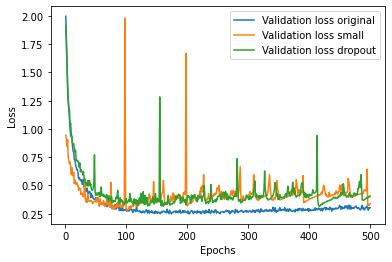

In [119]:
# plotting the validation loss for each of the models
loss = history.history['val_loss']
loss_small = history_small.history['val_loss']
loss_dropout = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Validation loss original')
plt.plot(epochs, loss_small, '-', label='Validation loss small')
plt.plot(epochs, loss_dropout, '-', label='Validation loss dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

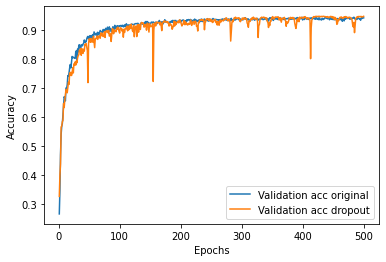

In [109]:
# plotting the validation accuracy for each of the models
acc = history.history['val_accuracy']
acc_dropout = history_dropout.history['val_accuracy']
plt.plot(epochs, acc, '-', label='Validation acc original')
plt.plot(epochs, acc_dropout, '-', label='Validation acc dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [110]:
# evaluate model on the test data
model_dropout.evaluate(X_test, one_hot_test_labels)

372/372 [==============================] - 1s 3ms/step - loss: 0.3914 - accuracy: 0.9521


[0.39142942428588867, 0.952104389667511]

In [102]:
model.evaluate(X_test, one_hot_test_labels)

372/372 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.9406


[0.28822749853134155, 0.9405723810195923]

In [120]:
model_small.evaluate(X_test, one_hot_test_labels)

372/372 [==============================] - 1s 2ms/step - loss: 0.3064 - accuracy: 0.9529


[0.3064301311969757, 0.9528619647026062]

In [123]:
test_features = test_data[['peak_1', 'peak_2', 'peak_3', 'peak_4', 'peak_5', 'peak_6']]
test_labels = test_data["codes"]

In [124]:
one_hot_test_labels = to_categorical(test_labels)

In [125]:
# evaluate model on the mesured xrd peaks
model_small.evaluate(test_features, one_hot_test_labels)

62/62 [==============================] - 0s 3ms/step - loss: 39.2999 - accuracy: 0.0933


[39.29989242553711, 0.09329298883676529]